## Cohort analysis

Conduct a cohort analysis of users using pandas to identify the cohort with the highest retention for the third month of the year, between January and December.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's import the `monthly_purchases` table from the last step.

In [14]:
monthly_purchases = pd.read_csv('monthly_purchases.csv')
monthly_purchases.head()

,Unnamed: 0,customer_unique_id,month,total_purchases,weeks,purchases_weekly
0,0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333


Let's keep only the columns with the user ID and month of activity. Then, we can add a `first_purchase` column with each user's first month of activity and the `activity_month` number.

In [15]:
purch = monthly_purchases[['customer_unique_id', 'month']].copy()
purch['first_purchase'] = purch.groupby('customer_unique_id')['month'].transform('min')
purch['month'] = pd.to_datetime(purch['month'].astype(str) + '-01').dt.to_period('M')
purch['first_purchase'] = pd.to_datetime(purch['first_purchase'].astype(str) + '-01').dt.to_period('M')
purch['activity_month'] = (purch['month'] - purch['first_purchase']).apply(lambda x: x.n)
purch.head()

,customer_unique_id,month,first_purchase,activity_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,2018-05,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,2018-05,0
2,0000f46a3911fa3c0805444483337064,2017-03,2017-03,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,2017-10,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11,2017-11,0


Now, we need to define the cohorts by counting the number of users in each month. Then, we can select the column with the maximum number of users for each cohort.

In [16]:
cohort = purch.groupby(['month', 'first_purchase', 'activity_month'], as_index=False).agg({'customer_unique_id': 'nunique'}) \
                    .rename(columns={'customer_unique_id': 'monthly_users'})
cohort.head()

,month,first_purchase,activity_month,monthly_users
0,2016-09,2016-09,0,2
1,2016-10,2016-10,0,270
2,2016-12,2016-12,0,1
3,2017-01,2016-12,1,1
4,2017-01,2017-01,0,731


To calculate retention, we separate the data related to the 2017 year and divide the current number of users in the cohort by the maximum number of users in the cohort.

In [17]:
cohort_17 = cohort.loc[cohort['month'].dt.year == 2017].copy()
cohort_17['max_users'] = cohort_17.groupby('first_purchase').monthly_users.transform('max')
cohort_17['retention'] = cohort_17.monthly_users.mul(100)/cohort_17.max_users
cohort_17.head()

,month,first_purchase,activity_month,monthly_users,max_users,retention
3,2017-01,2016-12,1,1,1,100.000000
4,2017-01,2017-01,0,731,731,100.000000
5,2017-02,2017-01,1,3,731,0.410397
6,2017-02,2017-02,0,1648,1648,100.000000
7,2017-03,2017-01,2,2,731,0.273598


The final stage involves creating a pivot and applying colors to visualize the data.

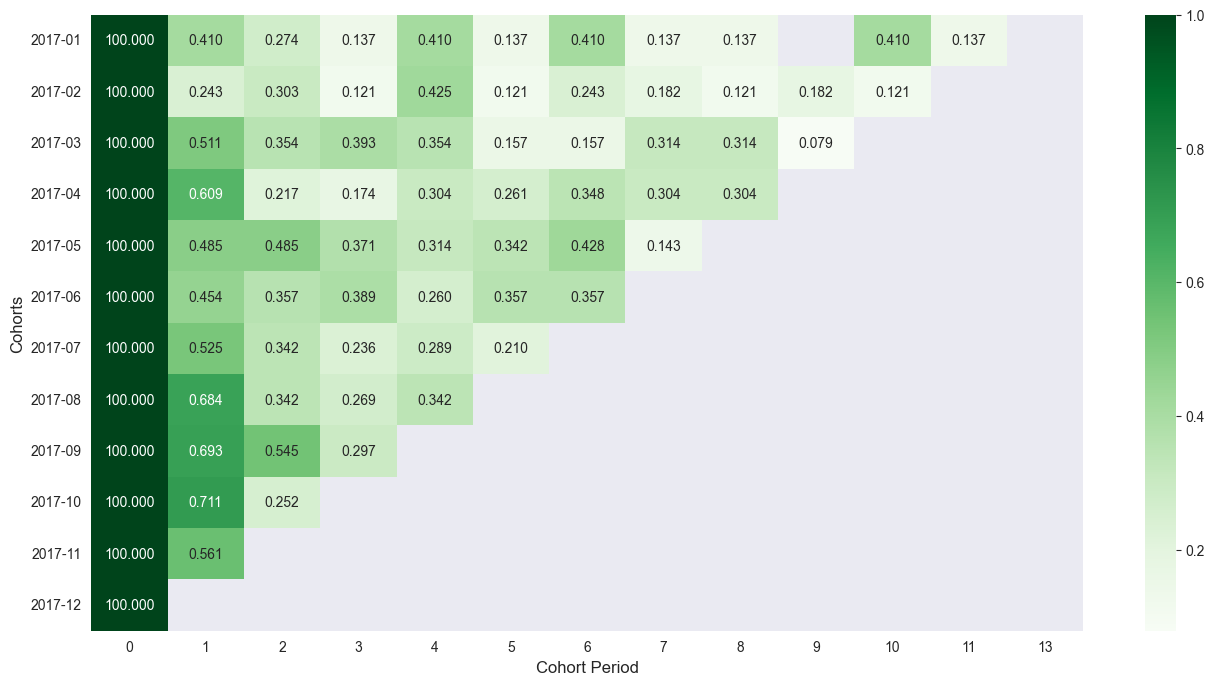

In [18]:
retention = cohort_17.pivot_table(index='first_purchase', columns='activity_month', values='retention')
sns.set_style("dark")
plt.figure(figsize=(16,8))
ax=sns.heatmap(retention.iloc[2:,:], vmax=1, annot=True, fmt='.3f', cmap='Greens')
plt.xlabel('Cohort Period', size=12)
plt.ylabel('Cohorts', size=12)
plt.yticks(rotation=0)
plt.show()

**Answer**: 

In this task, we used pandas to conduct a cohort analysis of users who joined between January and December. 
- We calculated the retention rate for each cohort at month 3.
- We found that the **cohort that joined in March had the highest retention rate at month 3, which was 0.39%**.
- This means that out of 100 users who joined in March, 0.39 users were still active in June.
- This suggests that the March cohort had the most loyal and engaged users among all the cohorts in the given period.